In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_size = 1
output_size = 1
num_epoch = 60
learning_rate = .001

In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [4]:
model = nn.Linear(input_size, output_size)

In [5]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
for i in range(num_epoch):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i+1)%5==0:
        print(f"Epoch: {i+1}/{num_epoch}, loss: {loss.item()}")

Epoch: 5/60, loss: 1.80543851852417
Epoch: 10/60, loss: 0.8389111757278442
Epoch: 15/60, loss: 0.44733723998069763
Epoch: 20/60, loss: 0.2886864244937897
Epoch: 25/60, loss: 0.22439640760421753
Epoch: 30/60, loss: 0.1983337104320526
Epoch: 35/60, loss: 0.18775752186775208
Epoch: 40/60, loss: 0.1834551990032196
Epoch: 45/60, loss: 0.18169453740119934
Epoch: 50/60, loss: 0.18096359074115753
Epoch: 55/60, loss: 0.18064983189105988
Epoch: 60/60, loss: 0.18050514161586761


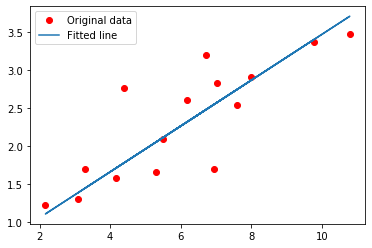

In [7]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()